In [1]:
class Student:
    def __init__(self, num, name, kor, eng, math):
        self._num = num
        self._name = name
        self._kor = kor
        self._eng = eng
        self._math = math
        self._total = self.kor + self.eng + self.math
        self._avg = (self.total) / 3
        self._order = 0

    @property
    def num(self):
        return self._num

    @property
    def name(self):
        return self._name

    @property
    def kor(self):
        return self._kor

    @property
    def eng(self):
        return self._eng

    @property
    def math(self):
        return self._math

    @property
    def total(self):
        return self._total

    @property
    def avg(self):
        return self._avg

    @property
    def order(self):
        return self._order

    @order.setter
    def order(self, value):
        self._order = value

    def Print_students(self):
        print("번호 : {}, 이름 : {}, 국어 : {}, 영어: {}, 수학 : {}, 총점 : {}, 평균 : {:03.2f}, 등수 : {}".format(self.num, self.name,
                                                                                                   self.kor, self.eng,
                                                                                                   self.math,
                                                                                                   self.total, self.avg,
                                                                                                   self.order))

In [2]:
class StudentGradingSystem:
    _student = []
    _student2 = []
    _population = 0
    class_total = 0
    class_avg = 0
    class_math_avg = 0
    class_kor_avg = 0
    class_eng_avg = 0
    class_kor_total = 0
    class_eng_total = 0
    class_math_total = 0

    def __init__(self):
        pass

    def register_student(self, Student):
        StudentGradingSystem._student.append(Student)
        StudentGradingSystem._population += 1
        StudentGradingSystem.class_total += Student.total
        StudentGradingSystem.class_kor_total += Student.kor
        StudentGradingSystem.class_eng_total += Student.eng
        StudentGradingSystem.class_math_total += Student.math

    def process(self):
        self.calculate_avg()
        self.calculate_eng_avg()
        self.calculate_kor_avg()
        self.calculate_math_avg()
        self.calculate_order()
        self.sort_by_order()

    @property
    def population(self):
        return self._population

    def calculate_avg(self):
        self.class_avg = self.class_total / self._population

    def calculate_kor_avg(self):
        self.class_kor_avg = self.class_kor_total / self._population

    def calculate_eng_avg(self):
        self.class_eng_avg = self.class_eng_total / self._population

    def calculate_math_avg(self):
        self.class_math_avg = self.class_math_total / self._population

    def Print_students(self):
        for i in StudentGradingSystem._student2:
            i.Print_students()

    def Print_class_information(self):
        print("총점 반 평균 : {:.2f}\n국어 반 평균 : {:.2f}\n영어 반 평균 : {:.2f}\n수학 반 평균 : {:.2f}".format(self.class_avg,
                                                                                              self.class_kor_avg,
                                                                                              self.class_eng_avg,
                                                                                              self.class_math_avg))

    def calculate_order(self):
        a = []
        for i in StudentGradingSystem._student:
            a.append(i.total)
        a = sorted(a, reverse=True)
        for i in StudentGradingSystem._student:
            if i.total in a:
                i.order = a.index(i.total) + 1

    def sort_by_order(self):
        check = self.same_check()
        if (check):
            temp = 1
            while temp != self._population + 1 :
                for i in StudentGradingSystem._student:
                    if i.order == temp:
                        StudentGradingSystem._student2.append(i)
                        StudentGradingSystem._student.remove(i)
                        temp += 1

        else :
            raise WrongStudentRecord("동점자가 있습니다.")

    def same_check(self):
        same_check = []
        for i in StudentGradingSystem._student:
            same_check.append(i.order)
        same_check = set(same_check)
        if len(same_check) != StudentGradingSystem._population:
            return False
        else : return True


In [3]:
class WrongStudentRecord(Exception):
    def __init__(self, msg):
        self._message = msg


def check_parameter():
    try:
        main()
    except TypeError:
        raise WrongStudentRecord("번호, 이름, 국어, 영어, 수학 성적 5개를 입력해주세요")
    except ValueError:
        raise WrongStudentRecord("시험 점수로는 정수를 입력해주세요")

In [4]:
def checkTime(func):
    import time

    def newFunc(*args, **kwargs):
        start = time.time()
        func(*args, **kwargs)
        end = time.time()
        print("\n실행시간 : ", end - start, "초")

    return newFunc


@checkTime
def main():
    data = open("data.txt","r",encoding="utf-8")
    a = []
    for lines in data:
        para = lines.split()
        para1 = int(para[0])
        para2 = para[1]
        para3 = int(para[2])
        para4 = int(para[3])
        para5 = int(para[4])

        temp = Student(para1,para2,para3,para4,para5)
        a.append(temp)

    b = StudentGradingSystem()

    for i in a:
        if(i.num < 0):
            raise WrongStudentRecord("{}의 번호 입력오류".format(i.name))
        if (i.eng > 100 or i.eng < 0):
            raise WrongStudentRecord("{}의 영어성적 입력오류".format(i.name))
        if (i.kor > 100 or i.kor < 0):
            raise WrongStudentRecord("{}의 국어성적 입력오류".format(i.name))
        if (i.math > 100 or i.math < 0):
            raise WrongStudentRecord("{}의 수학성적 입력오류".format(i.name))

        b.register_student(i)


    b.process()

    b.Print_students()
    print()
    b.Print_class_information()
    
    from matplotlib import pyplot as plt
    for i in range(len(StudentGradingSystem._student2)):
        subject = ["kor","eng","math"]
        grade = [b._student2[i].kor,b._student2[i].eng,b._student2[i].math]
        xs = [j + 5 for j, _ in enumerate(subject)]
        plt.bar(xs,grade)
        plt.ylabel("grade")
        plt.title("{}'s subject grade".format("#"+str(b._student2[i].num)+"'s grade"))
        plt.xticks([j+ 5 for j, _ in enumerate(subject)],subject)
        plt.show() 
        
    subject = ["kor","eng","math"]
    grade = [b.class_kor_avg,b.class_eng_avg,b.class_kor_avg]
    xs = [j + 5 for j, _ in enumerate(subject)]
    plt.bar(xs,grade)
    plt.ylabel("grade")
    plt.title("class avg grade")
    plt.xticks([j+ 5 for j, _ in enumerate(subject)],subject)
    plt.show() 

In [5]:
%%writefile data.txt
1 홍길일 86 90 91
2 홍길이 97 30 96
3 홍길삼 78 63 68
4 홍길사 37 39 80
5 홍길오 69 88 99
6 홍길육 37 33 27


Overwriting data.txt


번호 : 1, 이름 : 홍길일, 국어 : 86, 영어: 90, 수학 : 91, 총점 : 267, 평균 : 89.00, 등수 : 1
번호 : 5, 이름 : 홍길오, 국어 : 69, 영어: 88, 수학 : 99, 총점 : 256, 평균 : 85.33, 등수 : 2
번호 : 2, 이름 : 홍길이, 국어 : 97, 영어: 30, 수학 : 96, 총점 : 223, 평균 : 74.33, 등수 : 3
번호 : 3, 이름 : 홍길삼, 국어 : 78, 영어: 63, 수학 : 68, 총점 : 209, 평균 : 69.67, 등수 : 4
번호 : 4, 이름 : 홍길사, 국어 : 37, 영어: 39, 수학 : 80, 총점 : 156, 평균 : 52.00, 등수 : 5
번호 : 6, 이름 : 홍길육, 국어 : 37, 영어: 33, 수학 : 27, 총점 : 97, 평균 : 32.33, 등수 : 6

총점 반 평균 : 201.33
국어 반 평균 : 67.33
영어 반 평균 : 57.17
수학 반 평균 : 76.83


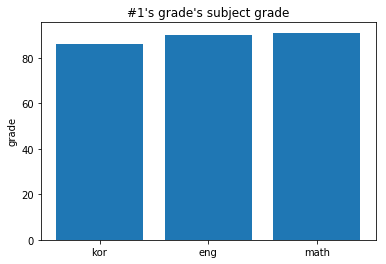

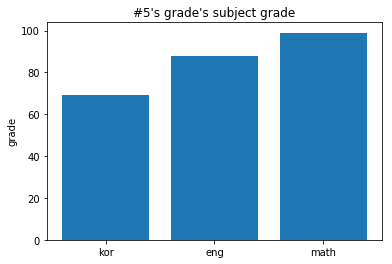

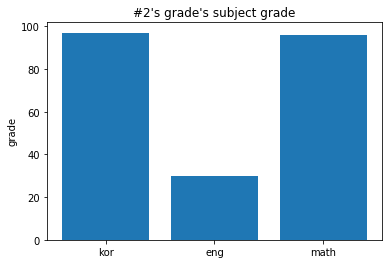

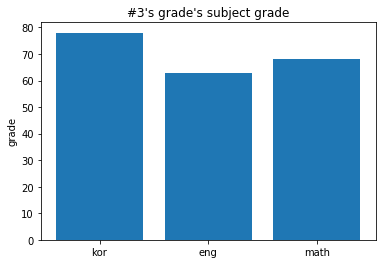

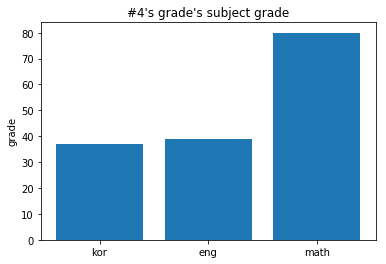

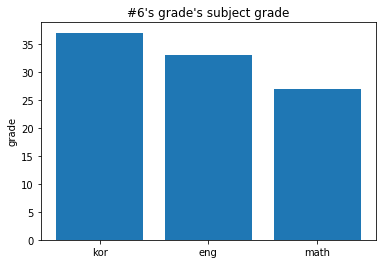

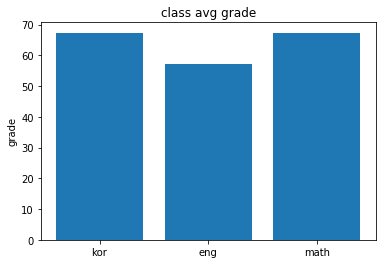


실행시간 :  1.187148094177246 초


In [6]:
if __name__ == '__main__':
    try:
        check_parameter()
    except WrongStudentRecord as e:
        print(e.args[0])
        
    

In [7]:
%%writefile Date_weekend.py

import sys
import datetime

if __name__ == '__main__':
    A = []
    Weekend = {"Monday" : "월요일",
               "Tuesday" : "화요일",
               "Wednesday" : "수요일",
               "Thursday" : "목요일",
               "Friday" : "금요일",
               "Saturday" : "토요일",
               "Sunday" : "일요일"
               }
    for items in sys.argv:
        A.append(items)
    B = []
    for i in range(1, 4):
        B.append(int(A[i]))
    try:
        date = datetime.date(B[0],B[1],B[2])
            
        b = date.strftime("%A")

        if b in Weekend:
            print(Weekend[b])
        
    except ValueError:
        print("알맞은 년월일을 입력해 주세요.")


Overwriting Date_weekend.py


In [8]:
%run Date_weekend.py 2018 04 29

일요일
